In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 500
d = 2

mu_1    = 5 * np.ones(d)
sigma_1 = np.identity(d)

mu_2    = -5 * np.ones(d)
sigma_2 = np.identity(d)

mixture_comp = np.random.randint(low=0, high=2, size=(N))

x = np.zeros((N, d))
x[mixture_comp == 0] = np.random.multivariate_normal(mean=mu_1, cov=sigma_1, size=(N))[mixture_comp == 0]
x[mixture_comp == 1] = np.random.multivariate_normal(mean=mu_2, cov=sigma_2, size=(N))[mixture_comp == 1]

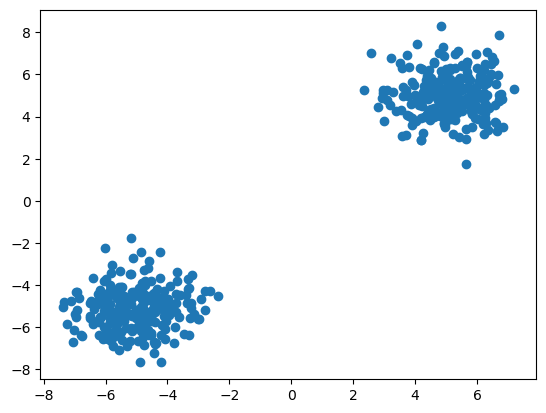

In [3]:
plt.scatter(x[:,0],x[:,1])

In [13]:
# need to define following things
# x: observed context
# w in W: decision to be made
# c: parameter of cost/utility function
# f(c, w): cost/utility function

# formulation: min_{w in W} f(c, w) 
# where {c in U(x)}

# (x) 1. generate x
# (x) 2. generate c = g(x)
# (x) 3. choose a function f(c, w)
# (*) 4. determine how to solve min_{w in W} f(c, w) for some simple choices of W: how to solve?
# ( ) 5. produce a dataset {(c, x)}
# ( ) 6. learn a predictor g^(x) = c
# ( ) 7. conformalize g^(x) to produce C(x) regions
# ( ) 8. solve min_{w in C(x)} f(c, w)

# goal: determine allocation of items to buy (where utility of each is unknown)
n = 20 # number of items
d = 10 # dim of context to utility

In [14]:
def g(x):
    theta = np.random.randint(low=0, high=2, size=(n, d))
    eps = np.random.uniform(low=4/5, high=6/5, size=(n))
    c = (theta @ x) ** 2 * eps
    return c

x = np.random.uniform(low=0, high=4, size=(d)) # contextual observation
c = g(x)

In [19]:
# w in [0, 1]^n such that p^T w < B
p = np.random.randint(low=0, high=1000, size=n)
u = np.random.uniform(low=0, high=1)
B = np.random.uniform(np.max(p), np.sum(p) - u * np.max(p))

In [25]:
import cvxpy as cp
import numpy as np

# Construct the problem.
w = cp.Variable(n)
objective = cp.Minimize(-c @ w)
constraints = [0 <= w, w <= 1, p @ w <= B]
prob = cp.Problem(objective, constraints)
result = prob.solve()